# Importing Libraries

In [1]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Data Loading

In [2]:
df = pd.read_csv('ECG-Dataset.csv')

# Data Overview

In [3]:
df

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0


# Information of the Dataset

In [4]:
df.shape

(333, 21)

In [5]:
df.head()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


In [6]:
df.tail()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0
332,68,1,0,0,92.0,2,165,80.0,1,0,...,0,68,0,115,75,1,0,4,0,0


# Descriptive Summary

In [7]:
df.describe()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


# Checking Null values

In [8]:
df.isnull().sum()

age          0
sex          0
smoke        0
years        0
ldl          0
chp          0
height       0
weight       0
fh           0
active       0
lifestyle    0
ihd          0
hr           0
dm           0
bpsys        0
bpdias       0
htn          0
ivsd         0
ecgpatt      0
qwave        0
target       0
dtype: int64

# Exploratory Data Analysis

## Histogram plot

<ipython-input-10-2fffd5a86478>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


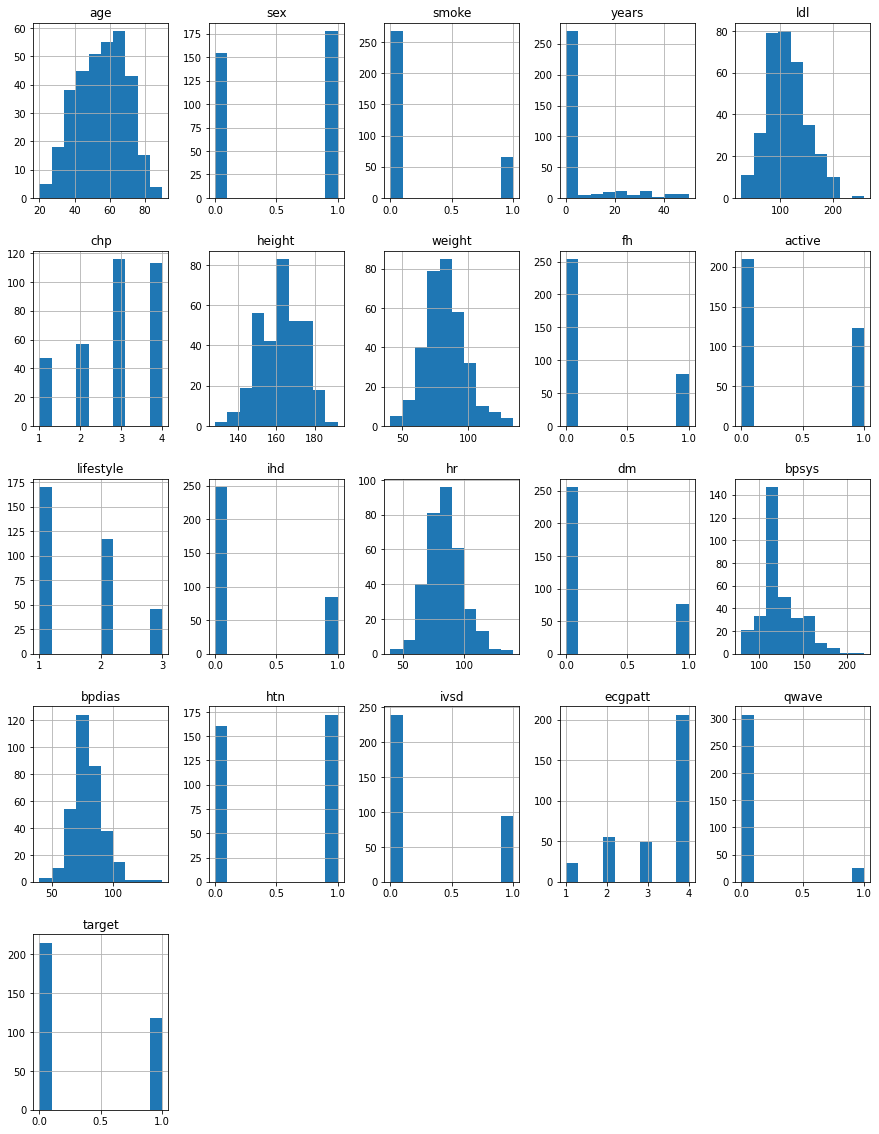

In [10]:
fg = plt.figure(figsize = (15,20))
ax = fg.gca()
df.hist(ax = ax)
plt.show()

<ipython-input-11-8f2af221fe31>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax = ax)


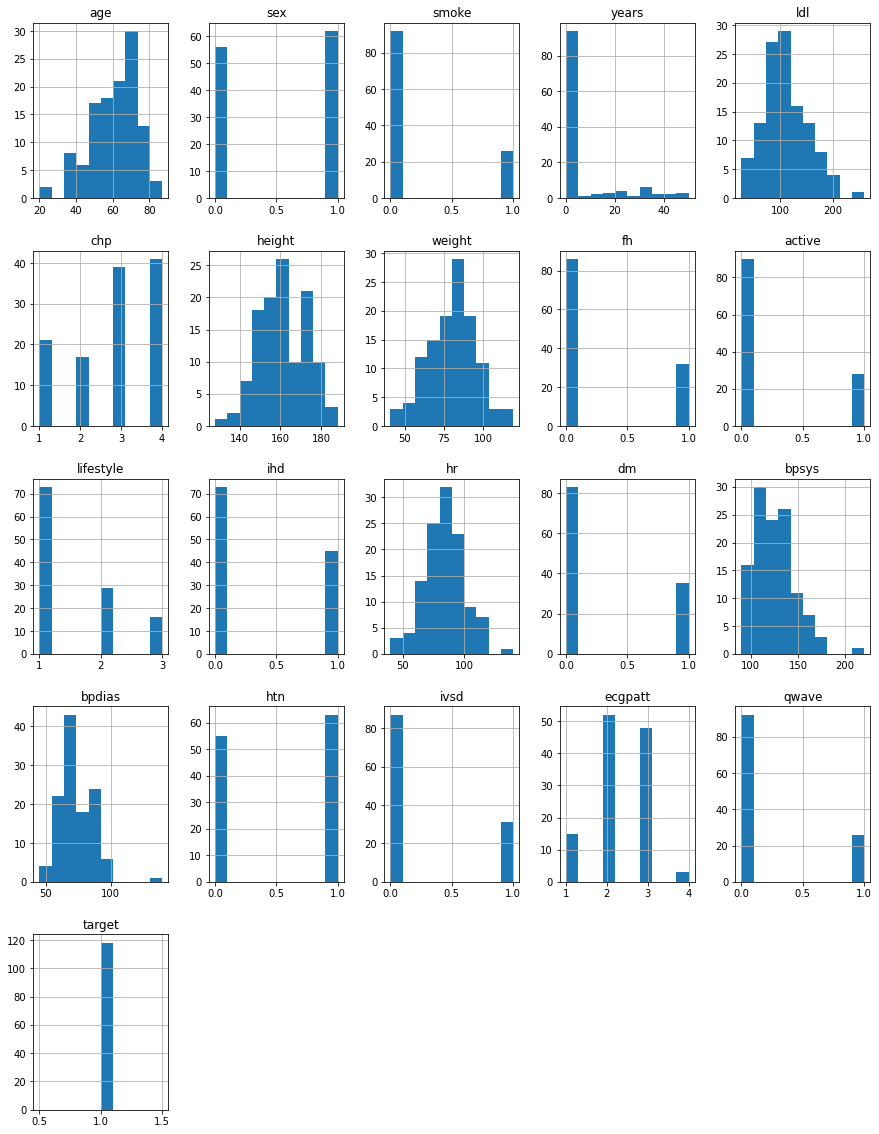

In [11]:
df1=df[df['target']==1]
columns=df.columns[:21]
fg = plt.figure(figsize = (15,20))
ax = fg.gca()
df1.hist(ax = ax)
plt.show()

# Heart Disease Frequency for Ages

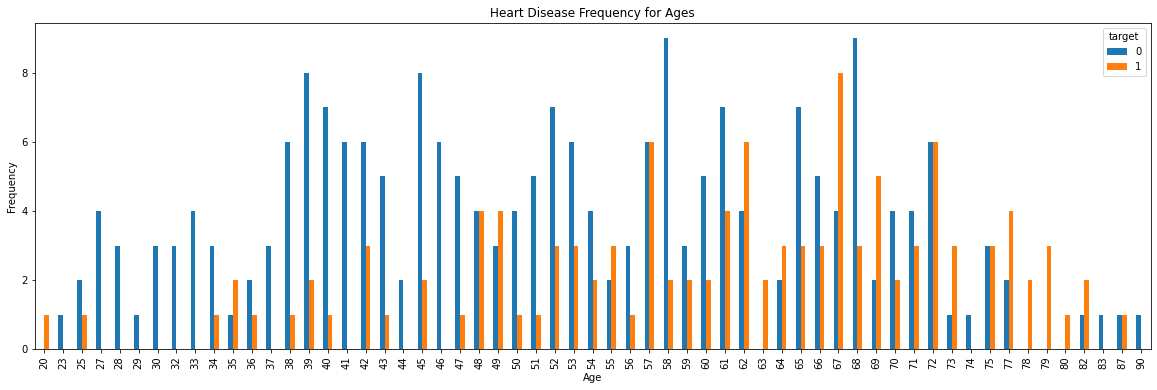

In [19]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap

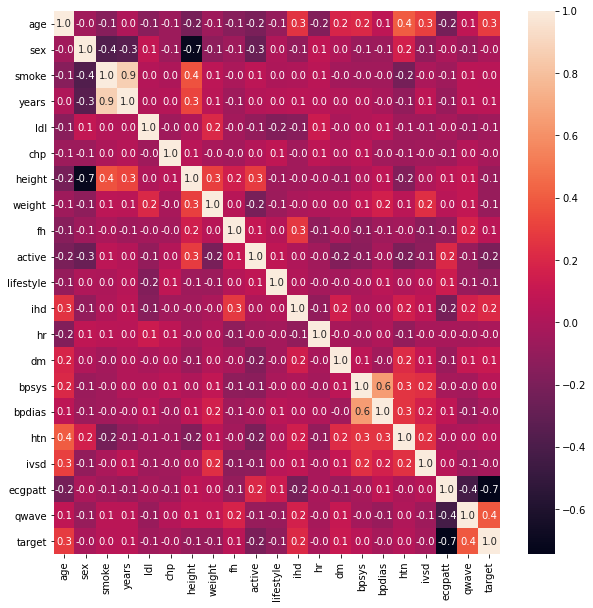

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

# Data Splitting

In [21]:
X = np.array(df.drop(['target'], 1))
Y = np.array(df['target'])

In [22]:
X[0]

array([ 65.,   0.,   0.,   0.,  69.,   4., 168., 111.,   1.,   0.,   1.,
         1.,  98.,   1., 120.,  80.,   1.,   0.,   4.,   0.])

In [23]:
mn = X.mean(axis=0)
X -= mn
st = X.std(axis=0)
X /= st

In [24]:
X.shape

(333, 20)

In [25]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=42, test_size = 0.2)

# Converting the data into Categorical labels

In [26]:
y_trn = to_categorical(Y_train, num_classes=None)
y_tst = to_categorical(Y_test, num_classes=None)
print (y_trn.shape)
print (y_trn[:10])

(266, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [27]:
er_stp = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

# Building the Model Using Neural Networks

In [28]:
model = Sequential()
model.add(Dense(64, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.20))         
model.add(Dense(2, activation='sigmoid'))
ad = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Fiting the model to the Test data

In [29]:
hst=model.fit(X_test, y_tst, validation_data=(X_test, y_tst), epochs=50, batch_size=10, callbacks=[er_stp])
acc = model.evaluate(X_test, y_tst)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")

Epoch 1/50
7/7 [==============================] - 1s 38ms/step - loss: 0.7239 - accuracy: 0.5224 - val_loss: 0.7121 - val_accuracy: 0.5672
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7273 - accuracy: 0.5224 - val_loss: 0.7078 - val_accuracy: 0.5672
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7187 - accuracy: 0.4627 - val_loss: 0.7026 - val_accuracy: 0.5672
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6974 - accuracy: 0.6119 - val_loss: 0.6960 - val_accuracy: 0.5672
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6963 - accuracy: 0.5970 - val_loss: 0.6874 - val_accuracy: 0.5672
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6779 - accuracy: 0.6269 - val_loss: 0.6769 - val_accuracy: 0.5821
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6656 - accuracy: 0.7015 - val_loss: 0.6623 - val_accuracy: 0.6119
Epoch 8/50
7/7 [================

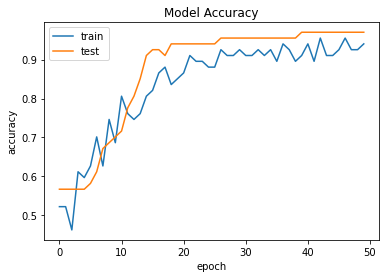

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

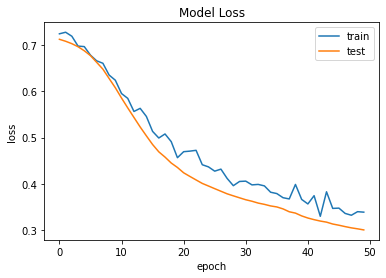

In [31]:
plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

# Classification Report 

In [32]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(Y_test, categorical_pred))
print(classification_report(Y_test, categorical_pred))

Results for Categorical Model
0.9701492537313433
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.94      1.00      0.97        29

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67

